In [0]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

### Curso-Taller 2019: Aprendizaje Automático e Imágenes en Python 
* Docentes:  Dra. Valeria S. Rulloni - Dra. Laura M. Vargas
* Ayudantes: Axel Aguerreberry - Sebastián Palacio
* Colaboradoras: Dra. Ana Carolina Maldonado - Dra. Claudia Egea

### Temario a desarrollar:
*	Uso y herramientas básicas de Python
*	Imágenes digitales: tipos (binarias, monocromáticas y a color)
*	Histograma. Mejora de la imagen: contraste, filtros: suavizado y detección de bordes.
*	Umbralado y Binarización. Operaciones Morfológicas: erosión, dilatación, cierre y apertura.
*	Clasificación de imágenes.
*	Aprendizaje automático
*	Aprendizaje profundo: Redes neuronales
*	Aplicaciones: Grafos para segmentación de imágenes, entre otras.



# Laboratorio Parte 1: Keras, MNIST data y redes totalmente conectadas (FC)

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from keras.layers import Input, Dense
from keras.models import Model
from keras.callbacks import EarlyStopping, ModelCheckpoint, Callback
from keras.optimizers import RMSprop

from tensorflow.examples.tutorials.mnist import input_data

Using TensorFlow backend.


In [0]:
sns.set_style("white")

In [4]:
tf.__version__

'1.15.0'

In [5]:
# importo y guardo MNIST data
mnist = input_data.read_data_sets("./mnist/data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/datas

### Documentación de Keras: https://keras.io/

## Exploración del dataset

In [6]:
# Dimensiones de la data
print("Imagenes de Entrenamiento: {}".format(mnist.train.images.shape))
print("Labels de Entrenamiento  : {}".format(mnist.train.labels.shape))

print("Imagenes de Testeo       : {}".format(mnist.test.images.shape))
print("Labels de Testeo         : {}".format(mnist.test.labels.shape))

Imagenes de Entrenamiento: (55000, 784)
Labels de Entrenamiento  : (55000, 10)
Imagenes de Testeo       : (10000, 784)
Labels de Testeo         : (10000, 10)


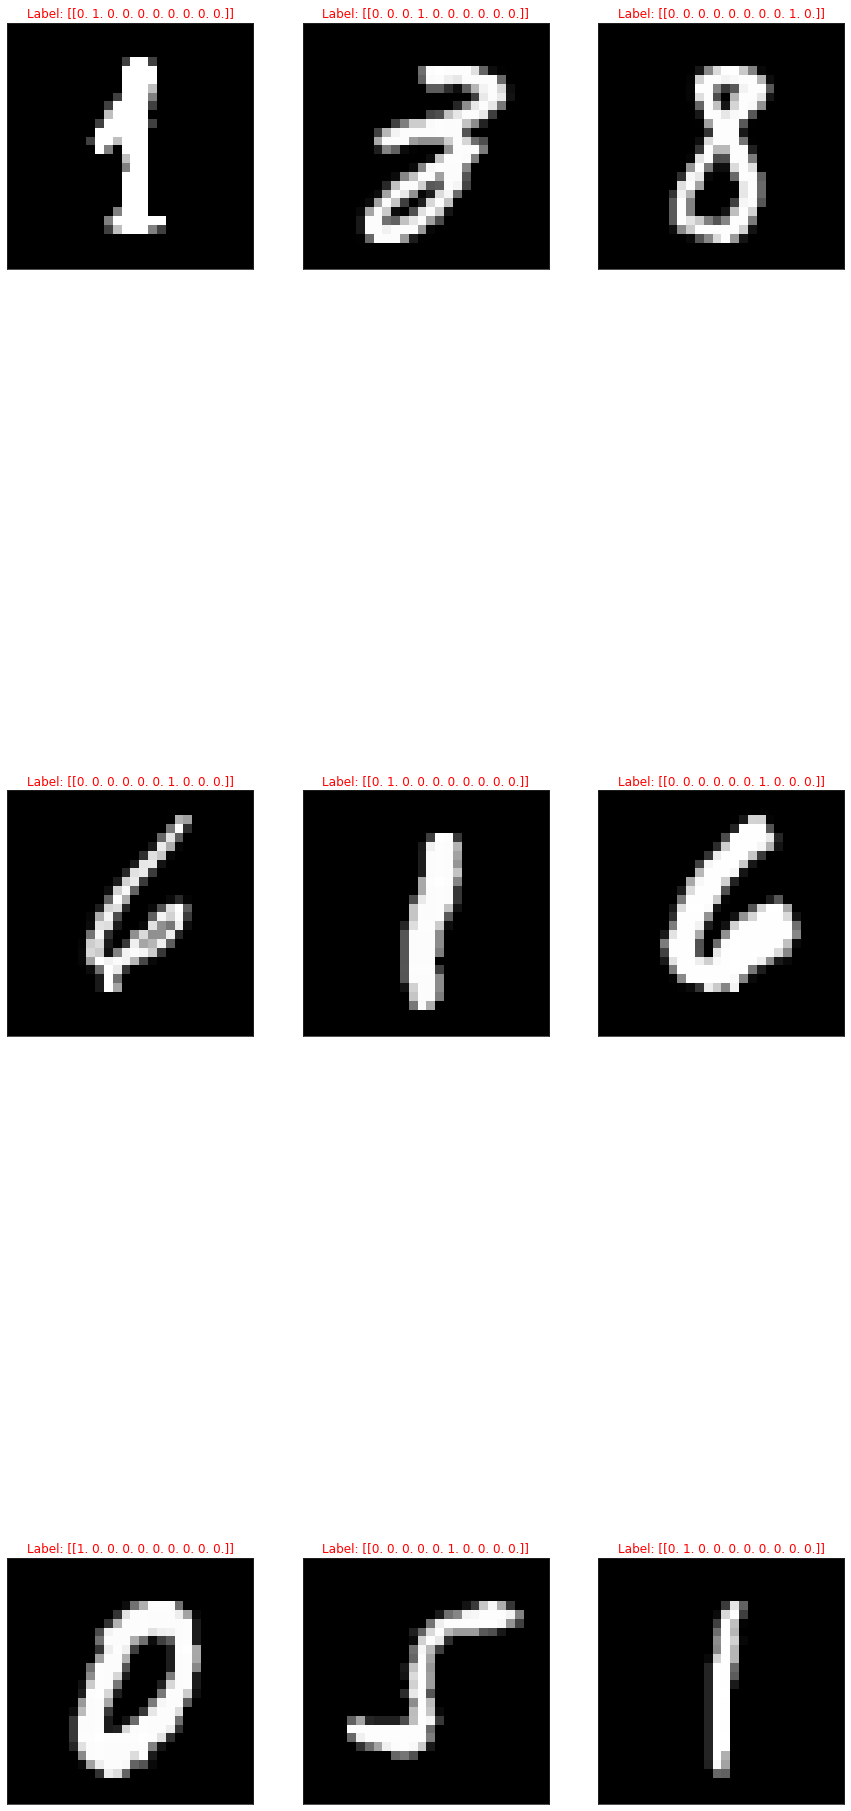

In [7]:
# Visualizamos algunas imagenes
fig, ax = plt.subplots(3, 3, figsize=[15, 40])

random_image = np.random.randint(low=0, high=55000, size=1)

for j in range(3):
    for i in range(3):
        random_image = np.random.randint(low=0, high=55000, size=1)

        ax[i,j].imshow(mnist.train.images[random_image].reshape(28, 28), 'gray')
        ax[i,j].set_xticks([])
        ax[i,j].set_yticks([])
        ax[i,j].set_title('Label: {}'.format(mnist.train.labels[random_image]), color='r')

# fig.subplots_adjust(wspace=0.1, hspace=0)
plt.show()

# Definición y entrenamiento del Modelo

In [8]:
### A completar: definir capa de entrada, capas ocultas, y capa de salida
### Utilizar funciones Input(), Dense()

# https://keras.io/getting-started/functional-api-guide/

inputs = Input(shape=(784,))
layer1 = Dense(64, activation='relu')(inputs)
layer2 = Dense(64, activation='relu')(layer1)
predictions = Dense(10, activation='softmax')(layer2)

In [0]:
### A completar: definir entrada y salida del modelo

model = Model(
    inputs=inputs,
    outputs=predictions
)

In [10]:
### A completar: definir optimizador y funcion de costo

# https://keras.io/examples/mnist_mlp/

model.compile(
    loss='categorical_crossentropy',
    optimizer=RMSprop(),
    metrics=['accuracy']
)

In [0]:
## para guardar el modelo
filepath = "prueba1.h5"
model_checkpoint = ModelCheckpoint(
    filepath,
    monitor='loss',
    verbose=1,
    save_best_only=True
)

In [12]:
%%time
history = model.fit(
    mnist.train.images, mnist.train.labels,
    batch_size=32,
    epochs=10,
    validation_data=(mnist.test.images, mnist.test.labels),
    callbacks=[model_checkpoint]
)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 55000 samples, validate on 10000 samples
Epoch 1/10





55000/55000 [==============================] - 4s 77us/step - loss: 0.3047 - acc: 0.9114 - val_loss: 0.1713 - val_acc: 0.9477

Epoch 00001: loss improved from inf to 0.30471, saving model to prueba1.h5
Epoch 2/10
55000/55000 [==============================] - 3s 61us/step - loss: 0.1452 - acc: 0.9576 - val_loss: 0.1285 - val_acc: 0.9595

Epoch 00002: loss improved from 0.30471 to 0.14521, saving model to prueba1.h5
Epoch 3/10
55000/55000 [==============================] - 3s 62us/step - loss: 0.1111 - acc: 0.9680 - val_loss: 0.1050 - val_acc: 0.9700

Epoch 00003: loss improved from 0.14521 to 0.11109, saving model to prueba1.h5
Epoch 4/10
55000/55000 [==============================] - 3s 61us/step - loss: 0.0935 - acc: 0.9728 - val_loss: 0.1172 - val_acc: 0.9659

Epoch 00004: loss improved from 0.11109 to 0.09354, saving mode

Text(0, 0.5, 'Loss')

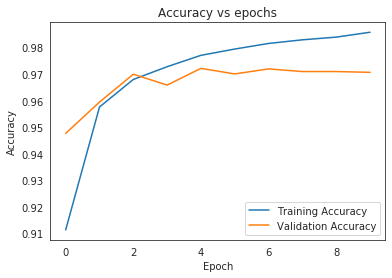

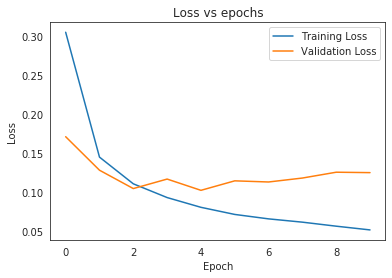

In [15]:
## visuzalimos curvas de entrenamiento

plt.figure()
plt.title("Accuracy vs epochs")
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.xlabel("Epoch")
plt.ylabel("Accuracy")


plt.figure()
plt.title("Loss vs epochs")
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel("Epoch")
plt.ylabel("Loss")

In [16]:
score = model.evaluate(mnist.test.images, mnist.test.labels, verbose=1)
print('Test loss    : {}'.format(score[0]))
print('Test accuracy: {}'.format(score[1]))

10000/10000 [==============================] - 0s 22us/step
Test loss    : 0.12537848018192
Test accuracy: 0.9707


## Usemos este modelo para hacer predicciones

In [1]:
model.predict?

Object `model.predict` not found.


In [0]:
## A completar: utilizar imagenes de testeo

predicciones = model.predict()

In [0]:
fig, ax = plt.subplots(3, 3, figsize=[15, 40])

for j in range(3):
    for i in range(3):
        random_image = np.random.randint(low=0, high=1000, size=1)

        ax[i,j].imshow(mnist.test.images[random_image].reshape(28,28), 'gray')
        ax[i,j].set_xticks([])
        ax[i,j].set_yticks([])
        ax[i,j].set_title('Prediccion de mi red: {}'.format(np.argmax(predictions[random_image])), color='r')

plt.show()